python -m jupyter kernelspec list

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [14]:
import h5py

def print_hdf5_structure(file_path):
    """
    Recursively prints the structure of an HDF5 file, including groups, datasets, and attributes.
    
    Parameters
    ----------
    file_path : str
        Path to the HDF5 file.
    """

    def print_attrs(name, obj, indent=0):
        """Helper to print attributes of a group or dataset."""
        prefix = " " * indent
        if obj.attrs:
            print(f"{prefix}  Attributes:")
            for key, val in obj.attrs.items():
                print(f"{prefix}    - {key}: {val}")

    def print_group(name, obj, indent=0):
        """Recursive visitor function for groups and datasets."""
        prefix = " " * indent
        if isinstance(obj, h5py.Group):
            print(f"{prefix}Group: {name}/")
        elif isinstance(obj, h5py.Dataset):
            print(f"{prefix}Dataset: {name} | shape={obj.shape}, dtype={obj.dtype}")
        print_attrs(name, obj, indent)

    # Open and walk through the file
    with h5py.File(file_path, "r") as f:
        print(f"HDF5 File: {file_path}")
        f.visititems(lambda name, obj: print_group(name, obj, indent=len(name.split('/')) * 2))

# Example usage:
print_hdf5_structure('results/17213_5.h5')


HDF5 File: results/17213_5.h5
  Group: gaze_angles/
    Group: gaze_angles/0_0/
      Attributes:
        - D20_Cornea: 60.983740234375
        - D20_OpticalDisc: 0.32911693572998046
        - D2_Macula: 4.1101596069335935
        - D5_Lens: 60.5395068359375
        - V27_CiliaryBody: 52.38054915659836
        - V55_Retina: 40.62586054555284
        - gaze_angle: [0 0]
        - total_cost: 427.56380320335427
        - volume_term: 199.71631680289985
      Dataset: gaze_angles/0_0/Chamber | shape=(100,), dtype=float64
      Dataset: gaze_angles/0_0/CiliaryBody | shape=(100,), dtype=float64
      Dataset: gaze_angles/0_0/Clip_m1 | shape=(100,), dtype=float64
      Dataset: gaze_angles/0_0/Clip_m2 | shape=(100,), dtype=float64
      Dataset: gaze_angles/0_0/Clip_m3 | shape=(100,), dtype=float64
      Dataset: gaze_angles/0_0/Clip_m4 | shape=(100,), dtype=float64
      Dataset: gaze_angles/0_0/Clip_m5 | shape=(100,), dtype=float64
      Dataset: gaze_angles/0_0/Cornea | shape=(100,), dtyp

In [6]:
from functions.patient import *

ModuleNotFoundError: No module named 'plotting'

In [3]:
pat = Patient(patient_id='P23336_5', h5py_file_path='results/P23336_5.h5')

NameError: name 'Patient' is not defined

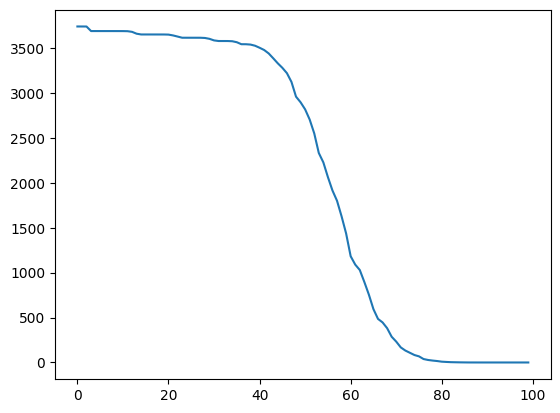

In [7]:
with h5py.File('results/P23336_5.h5', "r") as f:
    plt.plot(np.array(f['gaze_angles']['0_0']['Chamber'][:]))
#plt.plot(pat.dvh_dict['Chamber']['0_0'])

In [8]:
mydict[(0,1)] = {}
mydict[(0,1)]['Lens'] = [7,8,9]
mydict

{(0, 0): {'Lens': [1, 2, 3], 'Eye': [4, 5, 6]}, (0, 1): {'Lens': [7, 8, 9]}}

In [12]:
roi ='Lens'
weights = {'D5_Lens': 1.0, 'Macula': 0.5}
for weight in weights:
    if roi in weight: print(True)
else: print(False)

True
False


In [1]:
weights = {'D2_Macula': 3, 'D20_OpticalDisc': 3, 'D20_Cornea': 1, 'V55_Retina':1, 'V27_CiliaryBody': 1, 'D5_Lens': 1}

In [2]:
len(weights)

6